## Noah Pishaki - Physics 490 - Assignment 11

Carry out an error analysis for the midpoint rule (Taylor expand around $ x_i + \frac{h}{2} $ and keep terms up to second order). Please show that the one-panel version absolute error.

$ \epsilon_{i} = \frac{h^3}{24}f''(\epsilon_{i}) $ and the composite version error is $ \epsilon = \frac{b-a}{24}h^2\bar{f}'' $ where $\bar{f}''$ is the arithmetic mean.

Taylor Expansion of $ f(x) $ around $ x_i + \frac{h}{2} $ is given by,

$ x_i + \frac{h}{2} = x_0 + \frac{h}{2} + ih $ where $ i = 0,1,2,3,4,5,6,7,8,9 $ and $ h = \frac{b-a}{n} $

Error Analysis for the midpoint rule is given by,

$ \epsilon_{i} = \frac{h^3}{24}f''(\epsilon_{i}) $

$ \epsilon_{i} = \frac{h^3}{24}f''(x_0 + \frac{h}{2} + ih) $

$ \epsilon_{i} = \frac{h^3}{24}f''(x_0 + \frac{\frac{b-a}{n}}{2} + i\frac{b-a}{n}) $

$ \epsilon = \frac{b-a}{24}h^2\bar{f}'' $

$ \epsilon = \frac{3-2}{6/3} = \frac{1}{24}(2) = \frac{1}{12} $

Error = $ 2\frac{1}{12} = \frac{1}{6} $ for one-panel version absolute error.






Analytical Value:  0.8813735870195429
Midpoint Method:  0.8640801978898135 Error:  1.7293389130 %
Rectangle Method:  0.898432869659475 Error:  1.7059282640 %
Trapezoid Method:  0.8813618018476096 Error:  0.0011785172 %
Simpson Method:  0.8813735872550068 Error:  0.0000000235 %


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


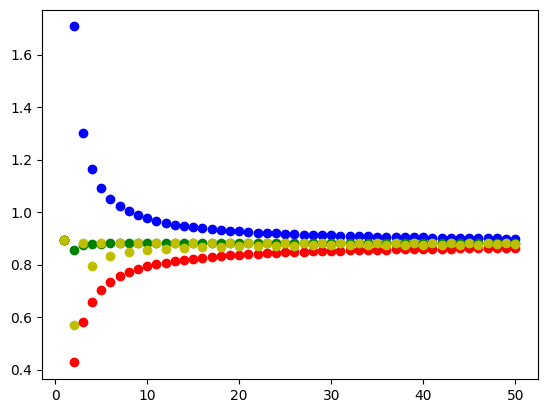

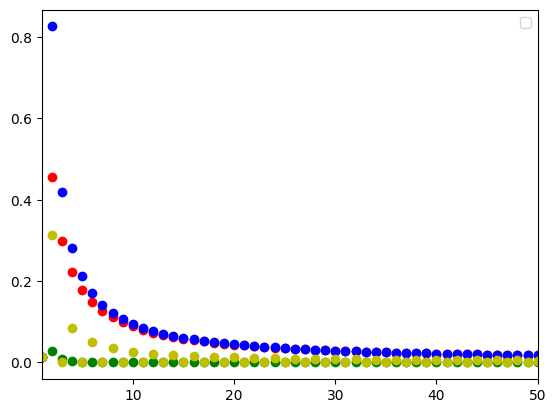

In [133]:
# Midpoint Rule

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/np.sqrt(x**2 + 1)

def rectangle(f,a,b,n):

    if n == 1:
        return f((a+b)/2)*(b-a)
    else:
        xs = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        fs = f(xs)

    return h*np.sum(fs)

def trapezoid(f,a,b,n):

    if n == 1:
        return f((a+b)/2)*(b-a)
    else:
        xs = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        fs = f(xs)
        cs = np.ones(n)
        cs[0] = 0.5
        cs[-1] = 0.5
    return h*np.sum(cs*fs)

def simpson(f,a,b,n):

    if n == 1:
        return f((a+b)/2)*(b-a)
    else:
        xs = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        fs = f(xs)
        cs = 2*np.ones(n)
        cs[1::2] = 4; cs[0] = 1; cs[-1] = 1
    return (h/3)*np.sum(cs*fs)

def midpoint(f,a,b,n):
    if n == 1:
        return f((a+b)/2)*(b-a)
    else:
        xs = np.linspace(a,b,n)
        h = (b-a)/n
        y = f(xs)
    return h*np.sum(y[0:-1]+y[1:])/2

if __name__ == '__main__':
    
    ans = np.log(1 + np.sqrt(2))
    xs = np.linspace(0.,1,51)
    
    print("Analytical Value: ", ans)
    print("Midpoint Method: ", midpoint(f,0.,1.,51), "Error: ", '{0:.10f}'.format(abs(ans - midpoint(f,0.,1.,51))*100), "%")
    print("Rectangle Method: ", rectangle(f,0.,1.,51), "Error: ", '{0:.10f}'.format(abs(ans - rectangle(f,0.,1.,51))*100), "%")
    print("Trapezoid Method: ", trapezoid(f,0.,1.,51), "Error: ", '{0:.10f}'.format(abs(ans - trapezoid(f,0.,1.,51))*100), "%")
    print("Simpson Method: ", simpson(f,0.,1.,51), "Error: ", '{0:.10f}'.format(abs(ans - simpson(f,0.,1.,51))*100), "%")

    #for integrator in (midpoint, rectangle, trapezoid, simpson):
    #    print(integrator(f, 0., 1., 51), end=" ")

    f1 = plt.figure(1)
    
    for i in range(1, 51):
        values=[]
        for integrator in (midpoint, rectangle, trapezoid, simpson):
            values.append(integrator(f,0.,1.,i))
        plt.plot(i,values[0],'ro')
        plt.plot(i,values[1],'bo')
        plt.plot(i,values[2],'go')
        plt.plot(i,values[3],'yo')

        
    f2 = plt.figure(2)
    
    for i in range(1,51):
        values=[]
        for integrator in (midpoint, rectangle, trapezoid, simpson):
            values.append(abs(ans - integrator(f,0.,1.,i)))

        plt.plot(i,values[0],'ro')
        plt.plot(i,values[1],'bo')
        plt.plot(i,values[2],'go')
        plt.plot(i,values[3],'yo')

    plt.autoscale(enable=True, axis='x', tight=True)
    plt.legend()
    plt.show()       

### Please prove (no programming) that for Simpson’s rule, the weights are

### $ w_i = \int_{x_{i+2}}^{x_i} L_i(x)dx = \frac{h}{3} $

### $ w_{i+1} = \int_{x_{i+2}}^{x_i} L_{i+1}(x)dx = \frac{4h}{3} $

### $ w_{i+2} = \int_{x_{i+2}}^{x_i} L_{i+2}(x)dx = \frac{h}{3} $

### where $ L_i(x) $ is the Lagrange polynomial for the $i$ th point.

Solution:

In exact form,

$ \int_{x_0}^{x_2} f(x)dx = \frac{h}{3}f(x_0) + \frac{4h}{3}f(x_1) + \frac{h}{3}f(x_2) - \frac{h^5}{90}f^{(4)}(\epsilon) $

where $\epsilon$ is the midpoint of the interval $[x_0, x_2]$. 

The error is $ \epsilon = \frac{h^5}{90}f^{(4)}(\epsilon) $.



If we consider Taylor expansion around $ x_1 $, we get

I = $ \int_a^b f(x)dx \approx \int_a^b f_2(x)dx $ where f_2(x) is a second order polynomial given by $ f_2(x) = a_0 + a_1x + a_2x^2 $



Choosing (a, f(a)), (\frac{a+b}{2}, f(\frac{a+b}{2})), (b, f(b)) as the three points of the funnction to evaluate $ a_0 + a_1x + a_2x^2 $ at, we get the following system of equations:

$ a_0 + a_1a + a_2a^2 = f(a) $

$ a_0 + a_1\frac{a+b}{2} + a_2\frac{a+b}{2}^2 = f(\frac{a+b}{2}) $

$ a_0 + a_1b + a_2b^2 = f(b) $



Solving for $ a_0, a_1, a_2 $ we get:

$ a_0 = \frac{f(a)}{6} + \frac{f(b)}{6} + \frac{4f(\frac{a+b}{2})}{3} $

$ a_1 = \frac{b-a}{6} $

$ a_2 = \frac{f(b)-f(a)}{6(b-a)} $

I = $ \int_a^b f(x)dx \approx \int_a^b f_2(x)dx = \int_a^b a_0 + a_1x + a_2x^2 dx $

$ = \int_a^b a_0dx + \int_a^b a_1xdx + \int_a^b a_2x^2dx $

$ = a_0\int_a^b dx + a_1\int_a^b xdx + a_2\int_a^b x^2dx $

$ = a_0(b-a) + a_1\frac{b^2-a^2}{2} + a_2\frac{b^3-a^3}{3} $

$ = \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2}) + f(b)] $



Since for Simpson's rule, $ h = \frac{b-a}{2} $, we get:

$ I = \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2}) + f(b)] = \frac{h}{3}[f(a) + 4f(\frac{a+b}{2}) + f(b)] $



Alternatively, the weights can be found by using the Lagrange polynomials. 

#### The Lagrange polynomials are given by: 

$ L_i(x) = \frac{(x-x_{i+1})(x-x_{i+2})}{(x_i-x_{i+1})(x_i-x_{i+2})} $

$ L_{i+1}(x) = \frac{(x-x_i)(x-x_{i+2})}{(x_{i+1}-x_i)(x_{i+1}-x_{i+2})} $

$ L_{i+2}(x) = \frac{(x-x_i)(x-x_{i+1})}{(x_{i+2}-x_i)(x_{i+2}-x_{i+1})} $



Therefore, the weights are given by:

$ f_2(x) = \frac{b-a}{6}[f(a) + 4f(\frac{a+b}{2}) + f(b)] $

$ f_2(x) = \frac{(x-\frac{a+b}{2})(x-b)}/(a-\frac{a+b}{2})(a-b) f(a) + \frac{(x-a)(x-b)}{(\frac{a+b}{2}-a)(\frac{a+b}{2}-b)} f(\frac{a+b}{2}) + \frac{(x-a)(x-\frac{a+b}{2})}{(b-a)(b-\frac{a+b}{2})} f(b) $

$ \int_a^b f_2(x)dx = \frac{h}{3}(f(a) + 4f(\frac{a+b}{2}) + f(b)) $

Any three-point quadratic interpolation polynomial will have the same form as $ f_2(x) $, so the weights will be the same for any three-point quadratic interpolation polynomial.

With a cost of $ O(n^2) $ for the Lagrange form, and $ O(n) $ for the three-point quadratic interpolation polynomial, the three-point quadratic interpolation polynomial is more efficient.



#### Neville's Algorithm: 

$ p'_{i,i}(x) = 0 $ for $ 0 \leq i \leq n $

$ p'_{i,j}(x) = \frac{(x-x_{i+j})(p'_{i,j-1}(x)) - (x-x_i)(p'_{i+1,j-1}(x))}{(x_i-x_{i+j})} $ for $ i \leq j \leq n $

At a cost of $ O(n^2) $, Neville's algorithm is more efficient than the Lagrange form.



#### The Bernstein form is given by:

$ B_{i,n}(x) = \binom{n}{i}x^i(1-x)^{n-i} $

$ p(x) = \sum_{i=0}^n f(x_i)B_{i,n}(x) $

$ \int_a^b p(x)dx = \sum_{i=0}^n f(x_i)\int_a^b B_{i,n}(x)dx $

$ = \sum_{i=0}^n f(x_i)\frac{b^i-a^i}{i!}(1-b)^{n-i}(1-a)^{n-i} $

$ = \sum_{i=0}^n f(x_i)\frac{b^i-a^i}{i!}(1-b-a)^{n-i} $

Which is the same as the Lagrange form. The Bernstein form is more efficient than the Lagrange form, but less efficient than the three-point quadratic interpolation polynomial. The Bernstein form is also more efficient than Neville's algorithm.